# 哈哈！让我玩一玩大数据！

In [6]:
import pandas as pd

# 1. 加载 Excel 文件
excel_path = 'metadata.xlsx'  # 替换为您的 Excel 文件路径
metadata = pd.read_excel(excel_path)
metadata.head().columns


Index(['ID', '标题', '发布时间'], dtype='object')

In [7]:
# 2. 查看基本信息
print("数据集基本信息：")
print("-" * 50)
print(f"文章总数：{len(metadata)}")
print("\n数据集列信息：")
print(metadata.info())

数据集基本信息：
--------------------------------------------------
文章总数：2501

数据集列信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      2501 non-null   int64         
 1   标题      2501 non-null   object        
 2   发布时间    2501 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 58.7+ KB
None


In [ ]:
import os

# 3. 分析文章内容
def read_article(file_id):
    try:
        with open(f'smsarticles/{file_id}.txt', 'r', encoding='utf-8') as f:
            return f.read()
    except:
        return None


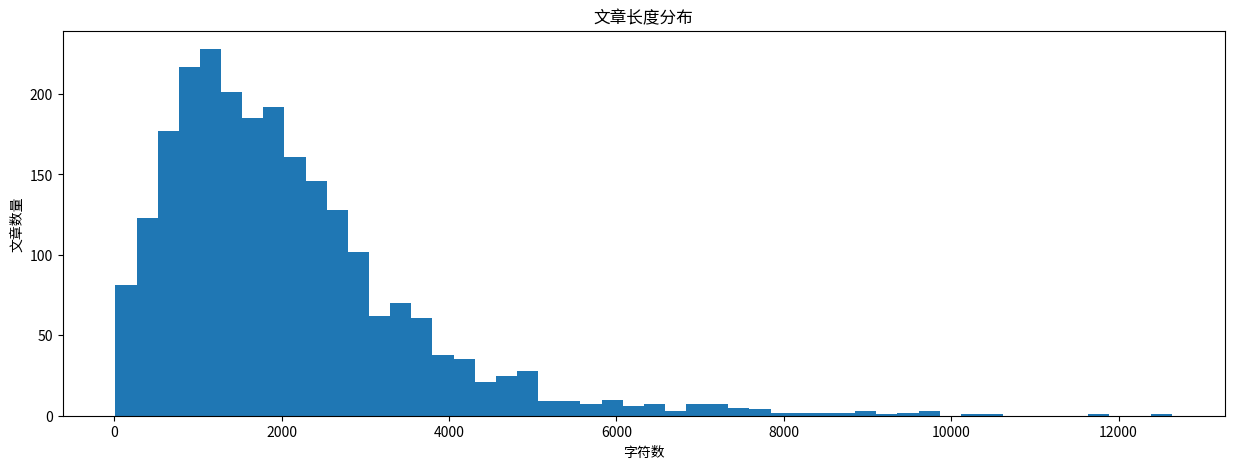


文章长度统计：
--------------------------------------------------
平均长度：2058.78 字符
最短文章：15 字符
最长文章：12641 字符


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import zhplot

# plt.style.use('seaborn')
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 4. 可视化分析
plt.figure(figsize=(15, 5))

# 统计所有文章的字符长度
all_lengths = []
for idx in metadata.index:
    text = read_article(idx)
    if text:
        all_lengths.append(len(text))

plt.hist(all_lengths, bins=50)
plt.title('文章长度分布')
plt.xlabel('字符数')
plt.ylabel('文章数量')
plt.show()

# 显示基本统计量
print("\n文章长度统计：")
print("-" * 50)
print(f"平均长度：{sum(all_lengths)/len(all_lengths):.2f} 字符")
print(f"最短文章：{min(all_lengths)} 字符")
print(f"最长文章：{max(all_lengths)} 字符")

In [6]:
import numpy as np

# 计算文章长度的分位数
length_percentiles = np.percentile(all_lengths, [0, 5, 10, 25, 50, 75, 90, 95, 100])
print("\n文章长度分位数分布：")
print("-" * 50)
for i, p in enumerate([0, 5, 10, 25, 50, 75, 90, 95, 100]):
    print(f"{p}分位数: {length_percentiles[i]:.0f} 字符")


文章长度分位数分布：
--------------------------------------------------
0分位数: 15 字符
5分位数: 381 字符
10分位数: 580 字符
25分位数: 1022 字符
50分位数: 1747 字符
75分位数: 2690 字符
90分位数: 3834 字符
95分位数: 4845 字符
100分位数: 12641 字符


In [ ]:
# # 设定阈值为10%分位数
# min_length_threshold =  100
# # 创建一个新的DataFrame来存储文章长度信息
# article_lengths = pd.DataFrame({
#     'article_id': list(range(len(all_lengths))),
#     'length': all_lengths
# })

# # 找出过短的文章
# short_articles = article_lengths[article_lengths['length'] < min_length_threshold]
# print(f"\n过短文章统计 (少于 {min_length_threshold:.0f} 字符)：")
# print("-" * 50)
# print(f"过短文章数量：{len(short_articles)}")
# print(f"占总文章比例：{(len(short_articles) / len(article_lengths) * 100):.2f}%")

# print("\n前10篇过短文章示例：")
# for idx in short_articles['article_id'].head(10):
#     text = read_article(idx)
#     if text is not None:
#         print(f"\n文章ID {idx}（{len(text)} 字符）:")
#         print(text[:100] + "..." if len(text) > 100 else text)
#     else:
#         print(f"\n文章ID {idx}：内容不存在或无法读取。")


过短文章统计 (少于 100 字符)：
--------------------------------------------------
过短文章数量：47
占总文章比例：1.98%

前10篇过短文章示例：

文章ID 69：内容不存在或无法读取。

文章ID 70（2694 字符）:
汪之涵：专注做内心真正想做的事 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。 4月28日上午，在五四青年节到来之际，我校在文体...

文章ID 195（677 字符）:
关于参加深圳中学2015年高中自主招生第一轮面试安排的通知 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。关于参加深圳中学201...

文章ID 272（1077 字符）:
深圳中学关于征集成美楼剧场名称的公告 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。深圳中学关于征集成美楼剧场名称的公告 各位老...

文章ID 288（1201 字符）:
【前沿】2015年诺贝尔奖——物理学奖 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。来源：科学网北京时间10月6日下午5点45...

文章ID 290（1202 字符）:
【动态】万科梅沙书院首次万圣节活动精彩落幕 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。10月31日是西方节日中的万圣节。为增...

文章ID 406（488 字符）:
深中学子喜获俄罗斯数学奥林匹克竞赛金牌 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。深中学子喜获俄罗斯数学奥林匹克竞赛金牌由俄...

文章ID 407（482 字符）:
深中10人进入深二模全市理科前十名 深圳中学 “未来不是我们要去的地方，而是需要我们创造的地方。”欢迎订阅我们！请直接点击标题下方的“深圳中学”添加关注。深中10人进入深二模全市理科前十名深圳市二模各...

文章ID 4

In [ ]:
# def remove_articles(article_ids, metadata_df):
#     """删除指定编号的文章并更新数据集"""
#     for aid in article_ids:
#         if os.path.exists(f'smsarticles/{aid}.txt'):
#             os.remove(f'smsarticles/{aid}.txt')
#     metadata_df = metadata_df[~metadata_df.index.isin(article_ids)].reset_index(drop=True)
#     metadata_df.to_excel('metadata.xlsx', index=False)
#     return metadata_df

In [ ]:
# remove_articles([0,26],metadata)

ID                                  标题                发布时间
0        4             深圳中学学科竞赛和北大清华等名校拟录取情况通报 2014-03-25 17:07:37
1        5                第二届卓越成长交流营暨家长论坛活动第二场 2014-03-28 15:55:21
2        6                 2014届深圳中学海外大学录取结果喜报 2014-04-04 16:11:45
3        7                          加拿大计算机竞赛喜报 2014-04-08 16:49:48
4        8  20132014学年共享教育智慧系列活动之二为了每一位学生的充分发展 2014-04-18 15:55:39
...    ...                                 ...                 ...
2496  2504           深中学子梁宇恒当我们谈论深中的时候我们会谈论些什么 2025-07-02 12:51:27
2497  2505                  深中荣耀丘成桐大学生数学竞赛捷报频传 2025-07-03 12:49:48
2498  2506                       AI赋能创意劳动让生活更美 2025-07-04 18:35:26
2499  2507                      深中学子吴宇鹏凤凰木下的成长 2025-07-06 11:30:00
2500  2508                             做有光的深中人 2025-07-12 18:32:17

[2501 rows x 3 columns]

In [9]:
# 安装必要的包
!pip install jieba wordcloud

In [14]:
import jieba
from wordcloud import WordCloud
from collections import Counter

# 定义停用词
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被'])

# 合并所有文章内容
all_text = ""
for idx in metadata.index:
    text = read_article(idx)
    if text:
        all_text += text + "\n"

# 分词并过滤停用词
words = jieba.cut(all_text)
word_counts = Counter(w for w in words if len(w) > 1 and w not in stopwords)


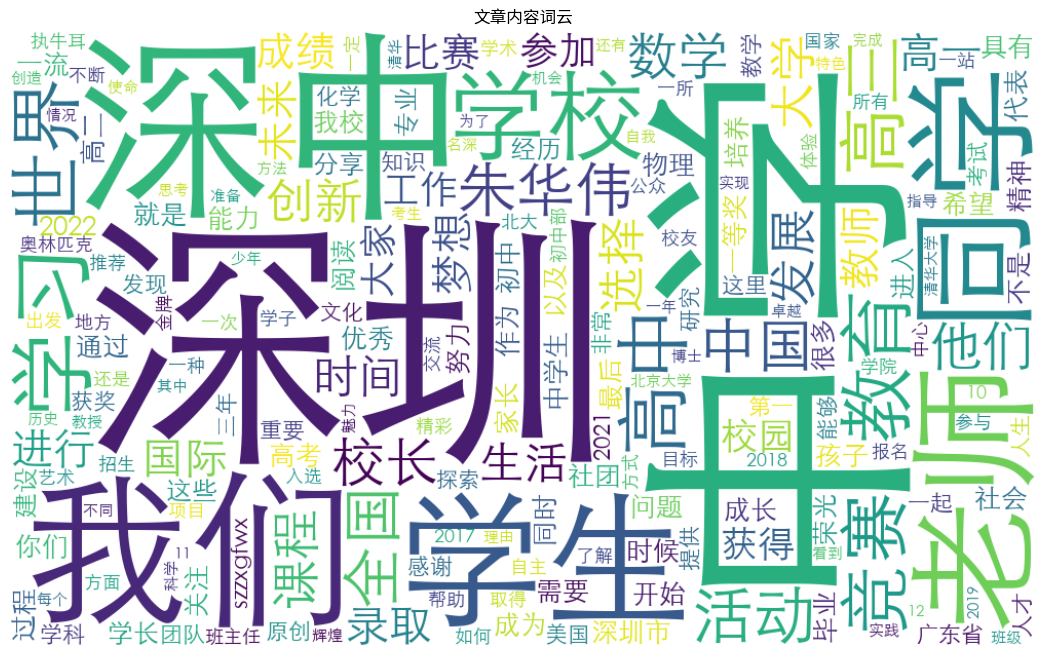


去除停用词后出现最多的20个词：
--------------------------------------------------
中学: 21354次
深圳: 19525次
深中: 19245次
我们: 13064次
学生: 10085次
同学: 8646次
老师: 8418次
学校: 8386次
学习: 6416次
教育: 4941次
世界: 4715次
高中: 4653次
竞赛: 4208次
高三: 4135次
活动: 4092次
全国: 4077次
朱华伟: 3818次
中国: 3786次
校长: 3775次
他们: 3744次


In [15]:
import zhplot
# 生成词云
wc = WordCloud(
    font_path='C:\Windows\Fonts\STXIHEI.TTF',
    width=1000,
    height=600,
    background_color='white'
)
wordcloud = wc.generate_from_frequencies(word_counts)

# 显示词云
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('文章内容词云')
plt.show()

# 显示高频词
print("\n去除停用词后出现最多的20个词：")
print("-" * 50)
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}次")


2014-2016 期间出现最多的10个词（共482篇文章）：
--------------------------------------------------
学生: 2348次
同学: 1155次
学习: 1085次
课程: 1038次
教育: 981次
老师: 963次
活动: 833次
他们: 812次
地方: 794次
国际: 778次

2017-2019 期间出现最多的10个词（共956篇文章）：
--------------------------------------------------
学生: 3949次
同学: 3444次
老师: 3328次
学习: 2172次
教育: 1875次
活动: 1824次
竞赛: 1744次
大学: 1499次
中国: 1456次
发展: 1408次

2020-2022 期间出现最多的10个词（共585篇文章）：
--------------------------------------------------
同学: 2573次
老师: 2406次
学生: 2293次
世界: 2053次
学习: 1853次
选择: 1639次
全国: 1512次
朱华伟: 1480次
高三: 1460次
高中: 1457次

2023-2025 期间出现最多的10个词（共478篇文章）：
--------------------------------------------------
老师: 1749次
朱华伟: 1545次
同学: 1517次
学生: 1505次
校长: 1390次
学习: 1340次
高中: 1327次
世界: 1237次
2022: 1229次
创新: 1017次


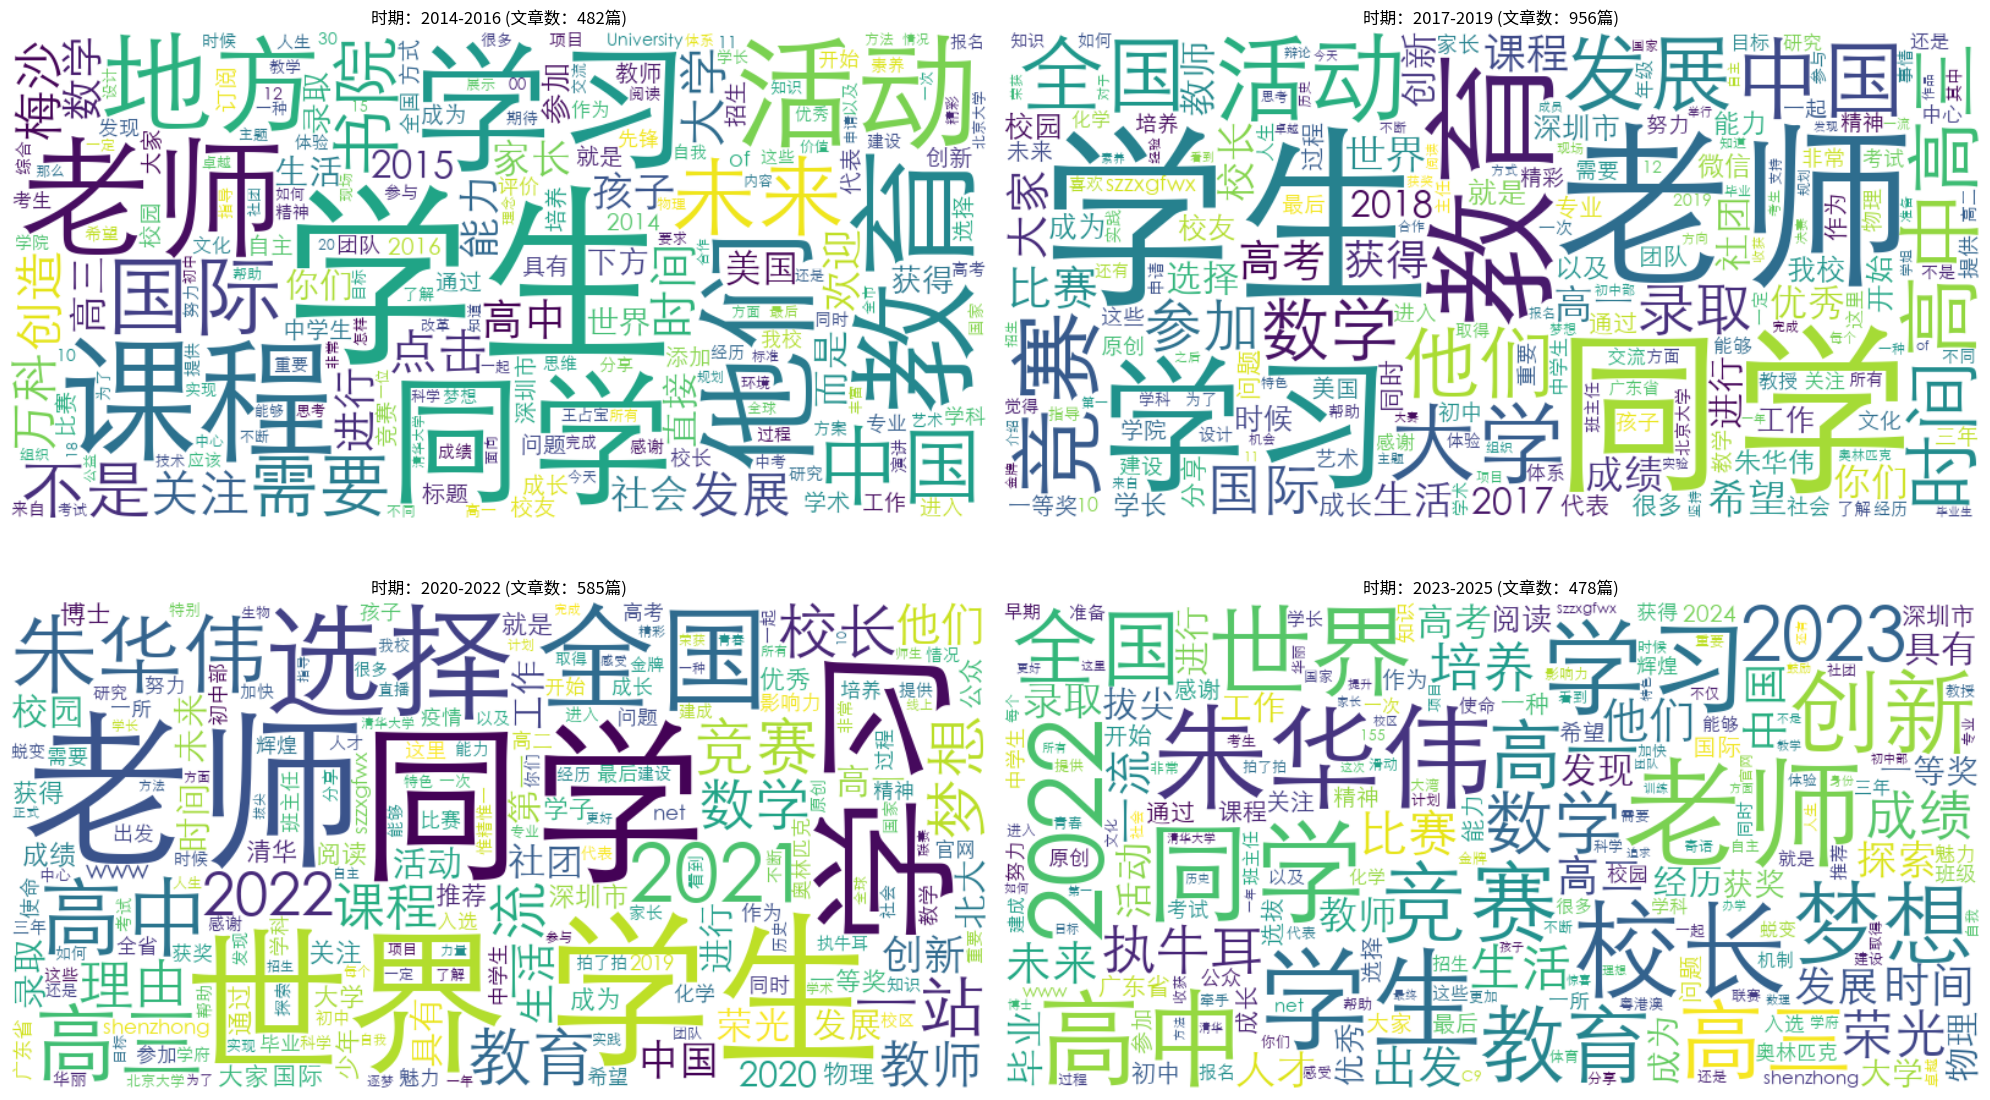


文章时间分布统计：
--------------------------------------------------
最早的文章发布于：2014-03-25 17:07:37
最新的文章发布于：2025-07-12 18:32:17
2014-2016期间的文章数：482篇
2017-2019期间的文章数：956篇
2020-2022期间的文章数：585篇
2023-2025期间的文章数：478篇


In [17]:
# 定义时期
periods = [
    (2014, 2016, '2014-2016'),
    (2017, 2019, '2017-2019'),
    (2020, 2022, '2020-2022'),
    (2023, 2025, '2023-2025')
]

# 定义停用词
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被', '深圳',
                '深中', '中学', '我们', '名深','扫码','左右滑动查看更多','学校'])

# 创建多个子图
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

# 预先统计每个时期的文章数
period_counts = {period[2]: 0 for period in periods}

for i, (start_year, end_year, period) in enumerate(periods):
    # 筛选该时期的文章
    period_text = ""
    # 使用发布时间的年份进行筛选
    period_articles = metadata[
        (metadata['发布时间'].dt.year >= start_year) & 
        (metadata['发布时间'].dt.year <= end_year)
    ]
    
    period_counts[period] = len(period_articles)
    
    # 收集该时期的所有文章
    for idx in period_articles.index:
        text = read_article(period_articles.loc[idx, 'ID'])
        if text:
            period_text += text + "\n"
    
    # 分词并过滤停用词
    words = jieba.cut(period_text)
    word_counts = Counter(w for w in words if len(w) > 1 and w not in stopwords)
    
    # 生成词云
    wc = WordCloud(
        font_path='C:\Windows\Fonts\STXIHEI.TTF',
        width=800,
        height=400,
        background_color='white'
    )
    
    if word_counts:  # 确保有文本再生成词云
        wordcloud = wc.generate_from_frequencies(word_counts)
        
        # 在对应的子图中显示词云
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'时期：{period} (文章数：{period_counts[period]}篇)')
        
        # 打印该时期的高频词
        print(f"\n{period} 期间出现最多的10个词（共{period_counts[period]}篇文章）：")
        print("-" * 50)
        for word, count in word_counts.most_common(10):
            print(f"{word}: {count}次")
    else:
        axes[i].text(0.5, 0.5, f'没有{period}期间的文章', 
                    ha='center', va='center')
        
plt.tight_layout()
plt.show()

# 打印时间跨度分布
print("\n文章时间分布统计：")
print("-" * 50)
print(f"最早的文章发布于：{metadata['发布时间'].min()}")
print(f"最新的文章发布于：{metadata['发布时间'].max()}")
for period, count in period_counts.items():
    print(f"{period}期间的文章数：{count}篇")

In [5]:
def prepare_text_data(metadata_df):
    """
    预处理文本数据，生成用于分析的DataFrame
    
    参数:
    metadata_df: DataFrame, 包含文章元信息的DataFrame
    
    返回:
    DataFrame: 包含处理后的文本内容和发布时间
    """
    texts = []
    dates = []
    
    # 收集文本和日期
    for idx in metadata_df.index:
        text = read_article(idx)
        if text:
            texts.append(text)
            dates.append(metadata_df.loc[idx, '发布时间'])
    
    # 创建DataFrame
    text_df = pd.DataFrame({
        '发布时间': dates,
        '内容': texts
    })
    
    # 确保发布时间为datetime类型并排序
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])
    text_df = text_df.sort_values('发布时间').reset_index(drop=True)
    
    return text_df

In [14]:
text_df = prepare_text_data(metadata)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_keyword_trend(text_df, keywords, window_days=30, mode="frequency", bold_word=None):
    """
    绘制关键词的词频或次数随时间变化曲线图（动态滑动窗口）

    参数:
    text_df: DataFrame, 包含 '发布时间' 和 '内容' 两列
    keywords: list of str, 要分析的关键词列表
    window_days: int, 滑动窗口大小（单位：天）
    mode: str, 'frequency' 表示计算词频，'count' 表示计算次数（默认 'frequency'）
    bold_word: str, 可选，要加粗显示的关键词（曲线加粗）
    """
    assert mode in ['frequency', 'count'], "mode 参数必须为 'frequency' 或 'count'"

    # 确保时间列为 datetime 类型
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])

    # 初始化结果 DataFrame
    result_df = pd.DataFrame()
    result_df['date'] = pd.date_range(
        start=text_df['发布时间'].min(),
        end=text_df['发布时间'].max(),
        freq='D'
    )

    # 计算每个滑动窗口内的词频/次数
    for word in keywords:
        values = []
        for date in result_df['date']:
            window_start = max(date - pd.Timedelta(days=window_days / 2), text_df['发布时间'].min())
            window_end = min(date + pd.Timedelta(days=window_days / 2), text_df['发布时间'].max())

            mask = (text_df['发布时间'] >= window_start) & (text_df['发布时间'] <= window_end)
            window_texts = text_df[mask]['内容'].tolist()

            if window_texts:
                word_count = sum(text.count(word) for text in window_texts)
                if mode == 'count':
                    values.append(word_count)
                elif mode == 'frequency':
                    total_chars = sum(len(text) for text in window_texts)
                    freq = word_count / total_chars if total_chars > 0 else 0
                    values.append(freq)
            else:
                values.append(0)

        result_df[word] = values

    # 绘制图像
    plt.figure(figsize=(15, 8))
    for word in keywords:
        lw = 3.5 if word == bold_word else 1.8
        plt.plot(result_df['date'], result_df[word], label=word, alpha=0.8, linewidth=lw)

    # 设置季度刻度和标签
    start_date = result_df['date'].min()
    end_date = result_df['date'].max()
    quarter_dates = pd.date_range(
        start=start_date.to_period('Q').to_timestamp(),
        end=end_date.to_period('Q').to_timestamp(),
        freq='Q'
    )
    quarter_labels = [f"{d.year}Q1" if d.quarter == 1 else f"Q{d.quarter}" for d in quarter_dates]
    plt.xticks(quarter_dates, quarter_labels, rotation=45)

    # 设置图表标题和标签
    mode_label = '词频' if mode == 'frequency' else '次数'
    plt.title(f'关键词{mode_label}变化趋势（滑动窗口：{window_days}天）')
    plt.xlabel('时间')
    plt.ylabel(mode_label)

    # 图例放到图内左上角，字体放大
    plt.legend(loc='upper left', fontsize=12, frameon=True)
    plt.grid(True, alpha=0.3)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


C:\Users\18487\AppData\Local\Temp\ipykernel_25328\1686075271.py:60: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_dates = pd.date_range(


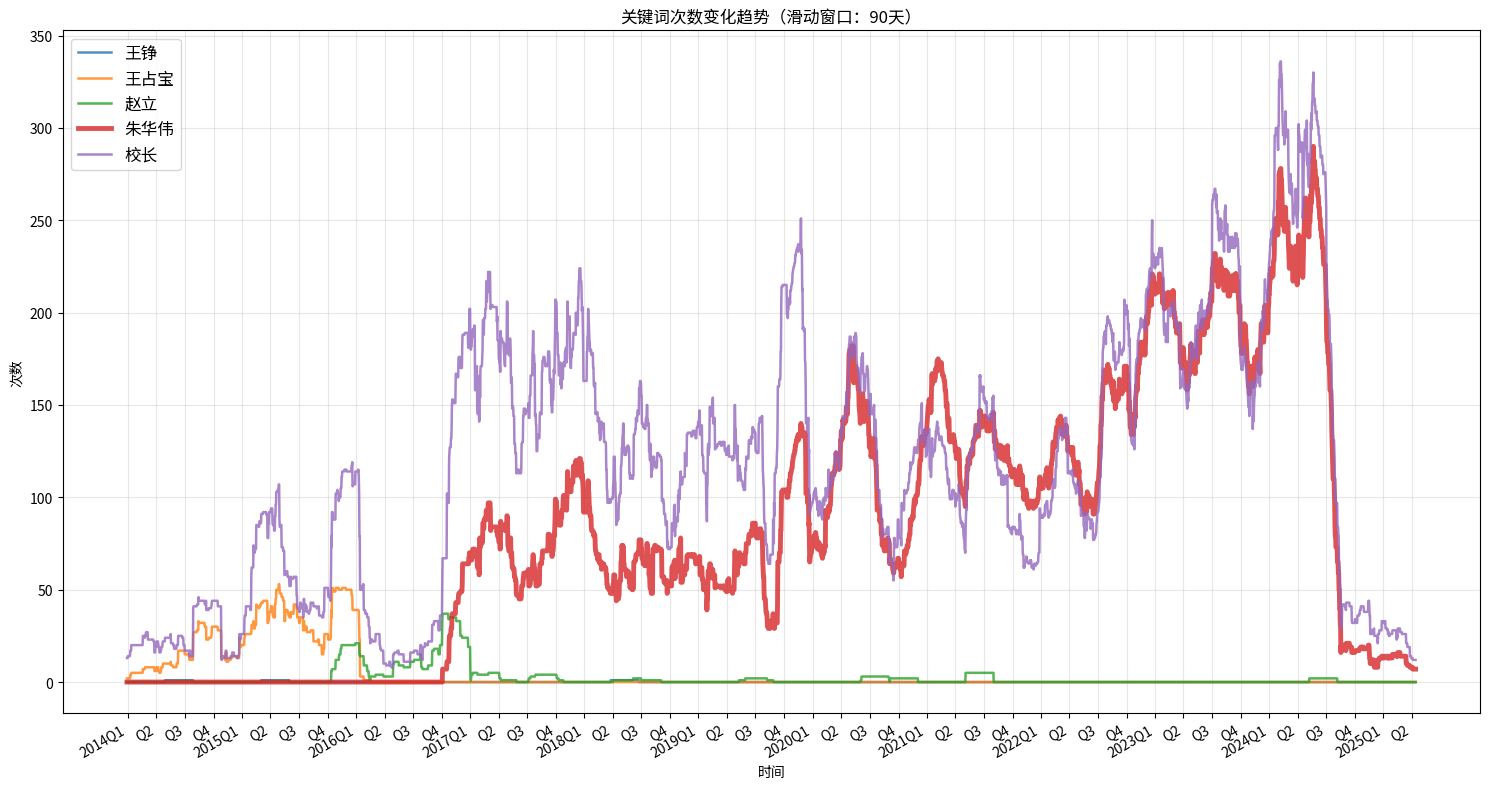

In [24]:
# 使用示例：分析感兴趣的关键词
keywords = ['王铮', '王占宝', '赵立', '朱华伟', '校长']
result_df = plot_keyword_trend(text_df, keywords, window_days=90,mode='count',bold_word='朱华伟')

In [29]:
def compute_total_mentions(text_df, keywords):
    """
    从原始文本中统计每个关键词的真实总提及次数（非滑窗）

    参数:
    text_df: DataFrame, 包含 '内容' 列
    keywords: list of str

    返回:
    Series: 每个关键词的总次数
    """
    counts = {}
    for word in keywords:
        total = text_df['内容'].apply(lambda x: x.count(word)).sum()
        counts[word] = total
    return pd.Series(counts).sort_values(ascending=False)


In [31]:
compute_total_mentions(text_df, ['王占宝', '赵立', '朱华伟'])

朱华伟    3827
王占宝     213
赵立       99
dtype: int64

C:\Users\18487\AppData\Local\Temp\ipykernel_25328\1686075271.py:60: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_dates = pd.date_range(


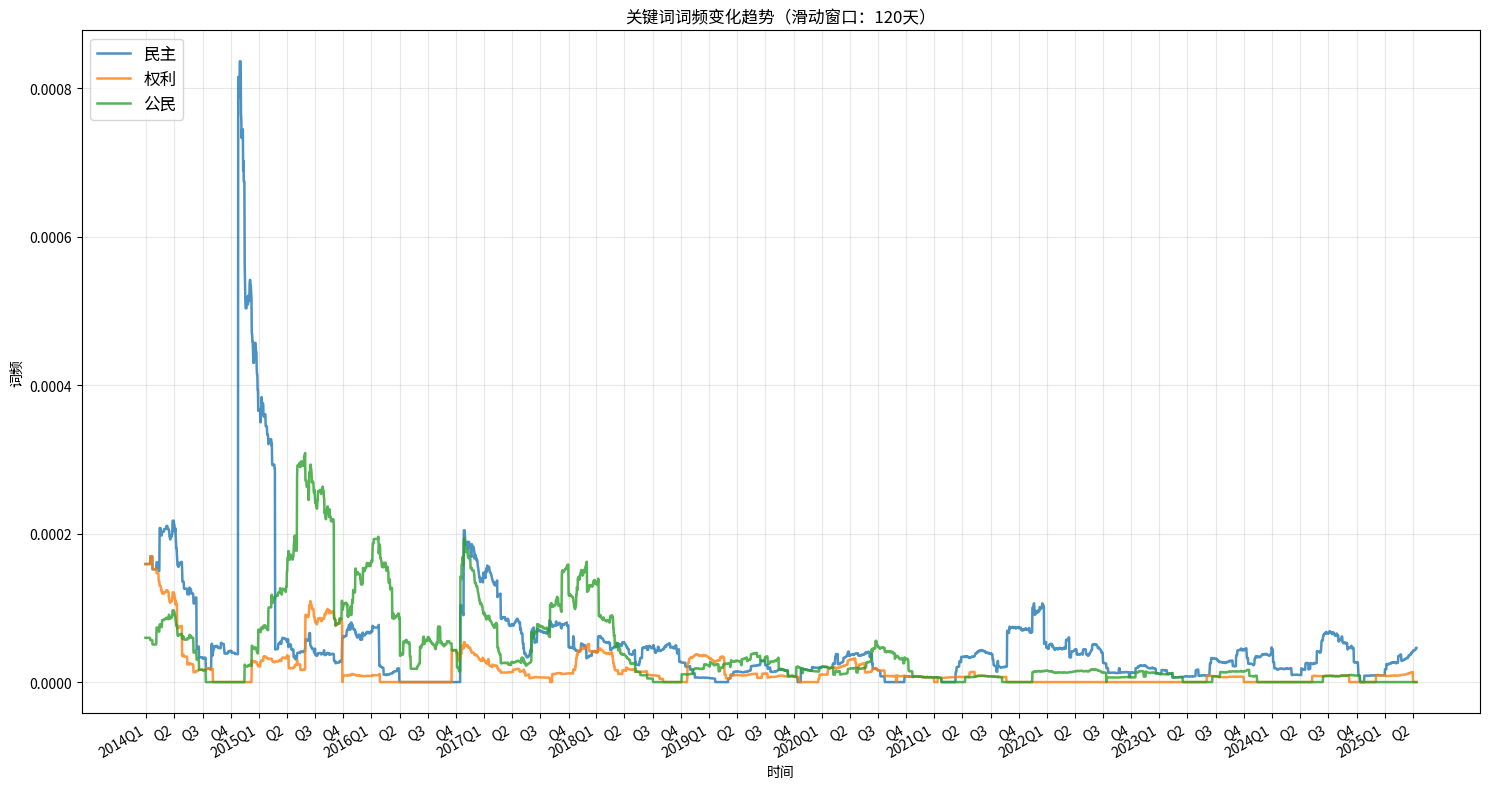

date        民主        权利       公民
0    2014-03-28 15:55:21  0.000159  0.000159  0.00006
1    2014-03-29 15:55:21  0.000159  0.000159  0.00006
2    2014-03-30 15:55:21  0.000159  0.000159  0.00006
3    2014-03-31 15:55:21  0.000159  0.000159  0.00006
4    2014-04-01 15:55:21  0.000159  0.000159  0.00006
...                  ...       ...       ...      ...
4120 2025-07-08 15:55:21  0.000043  0.000000  0.00000
4121 2025-07-09 15:55:21  0.000044  0.000000  0.00000
4122 2025-07-10 15:55:21  0.000046  0.000000  0.00000
4123 2025-07-11 15:55:21  0.000046  0.000000  0.00000
4124 2025-07-12 15:55:21  0.000046  0.000000  0.00000

[4125 rows x 4 columns]

In [34]:
keywords = ['民主','权利','公民']
plot_keyword_trend(text_df, keywords, window_days=120)

In [45]:
import pandas as pd
import jieba
from collections import Counter

def is_valid_word(word):
    """只保留二字及以上的纯中文词"""
    return len(word) >= 2 and all('\u4e00' <= ch <= '\u9fff' for ch in word)

def compute_keyword_freq_shift_dual(text_df, top_n=30):
    """
    分别返回2018年后上升词汇 & 下降词汇的词频对比表格（按差值排序）

    返回:
    df_rise: 词频上升最大的词（2018年后 - 2018年前 > 0）
    df_fall: 词频下降最大的词（2018年后 - 2018年前 < 0）
    """

    # 确保时间列格式正确
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])
    text_df['年份'] = text_df['发布时间'].dt.year

    # 分期
    before_texts = text_df[text_df['年份'] <= 2018]['内容'].tolist()
    after_texts = text_df[text_df['年份'] > 2018]['内容'].tolist()

    def tokenize_and_count(texts):
        all_words = []
        total_chars = 0
        for text in texts:
            total_chars += len(text)
            words = jieba.lcut(text)
            valid_words = [w for w in words if is_valid_word(w)]
            all_words.extend(valid_words)
        freq = Counter(all_words)
        return {word: count / total_chars for word, count in freq.items()}

    before_freq = tokenize_and_count(before_texts)
    after_freq = tokenize_and_count(after_texts)

    all_words = set(before_freq.keys()).union(after_freq.keys())
    data = []

    for word in all_words:
        bf = before_freq.get(word, 0)
        af = after_freq.get(word, 0)
        delta = af - bf  # 正值表示“崛起词”
        data.append({
            '词语': word,
            '2018年前词频': bf,
            '2018年后词频': af,
            '词频差值': delta
        })

    df_all = pd.DataFrame(data)

    # 拆成正向变化、负向变化
    df_rise = df_all[df_all['词频差值'] > 0].sort_values(by='词频差值', ascending=False).head(top_n).reset_index(drop=True)
    df_fall = df_all[df_all['词频差值'] < 0].sort_values(by='词频差值').head(top_n).reset_index(drop=True)

    return df_rise, df_fall



In [46]:
rise_df, fall_df = compute_keyword_freq_shift_dual(text_df, top_n=30)

# 可视化或导出
from IPython.display import display
display(rise_df)
display(fall_df)


词语  2018年前词频  2018年后词频      词频差值
0    深中  0.002579  0.004872  0.002293
1    中学  0.003630  0.004875  0.001245
2   朱华伟  0.000281  0.001126  0.000845
3    世界  0.000533  0.001262  0.000729
4    荣光  0.000006  0.000605  0.000599
5    梦想  0.000255  0.000782  0.000527
6    一流  0.000143  0.000655  0.000512
7    校长  0.000493  0.000965  0.000472
8    一站  0.000003  0.000456  0.000453
9   执牛耳  0.000000  0.000434  0.000434
10   全国  0.000598  0.000996  0.000398
11   高中  0.000729  0.001105  0.000377
12   出发  0.000059  0.000425  0.000366
13   高一  0.000385  0.000729  0.000344
14   理由  0.000033  0.000355  0.000321
15   名深  0.000031  0.000341  0.000310
16   扫码  0.000005  0.000301  0.000296
17   公众  0.000085  0.000360  0.000275
18   官网  0.000042  0.000312  0.000270
19   北大  0.000096  0.000360  0.000264
20   辉煌  0.000067  0.000331  0.000264
21   蜕变  0.000012  0.000276  0.000264
22  拍了拍  0.000000  0.000262  0.000262
23  影响力  0.000048  0.000310  0.000262
24   推荐  0.000092  0.000353  0.000260
25   拔尖  0.000048  0.000306  0.000258
26   清华  0.000082  0.000338  0.000256
27   学府  0.000018  0.000271  0.000253
28   选择  0.000524  0.000774  0.000250
29   华丽  0.000007  0.000256  0.000249

词语  2018年前词频  2018年后词频      词频差值
0   学生  0.002604  0.001686 -0.000917
1   活动  0.001109  0.000648 -0.000462
2   校友  0.000525  0.000106 -0.000419
3   地方  0.000502  0.000099 -0.000403
4   自己  0.002089  0.001729 -0.000360
5   一个  0.001604  0.001244 -0.000360
6   课程  0.000925  0.000567 -0.000358
7   我们  0.002874  0.002530 -0.000344
8   书院  0.000381  0.000042 -0.000340
9   点击  0.000368  0.000056 -0.000311
10  美国  0.000492  0.000182 -0.000310
11  国际  0.000793  0.000493 -0.000300
12  不是  0.000521  0.000222 -0.000299
13  创造  0.000389  0.000099 -0.000291
14  梅沙  0.000302  0.000014 -0.000288
15  万科  0.000283  0.000013 -0.000270
16  需要  0.000592  0.000322 -0.000270
17  欢迎  0.000298  0.000059 -0.000239
18  大学  0.000809  0.000570 -0.000238
19  参加  0.000678  0.000444 -0.000234
20  直接  0.000273  0.000048 -0.000225
21  可以  0.000815  0.000595 -0.000220
22  订阅  0.000219  0.000000 -0.000219
23  标题  0.000220  0.000008 -0.000212
24  添加  0.000215  0.000006 -0.000210
25  下方  0.000233  0.000024 -0.000209
26  先锋  0.000230  0.000030 -0.000201
27  他们  0.000882  0.000685 -0.000197
28  学院  0.000361  0.000166 -0.000196
29  什么  0.000495  0.000303 -0.000192

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_rise_fall_wordclouds(rise_df, fall_df, stopwords=None):
    """
    分别绘制 2018年后词频上升/下降的词云图，左右并排，绿色和红色色调

    参数:
    rise_df: DataFrame，包含 ['词语', '词频差值']
    fall_df: DataFrame，包含 ['词语', '词频差值']
    stopwords: set, 可选，自定义停用词集合
    """

    # 准备词频字典，去除停用词
    def make_freq_dict(df):
        return {
            row['词语']: row['词频差值']
            for _, row in df.iterrows()
            if not stopwords or row['词语'] not in stopwords
        }

    rise_freq = make_freq_dict(rise_df)
    fall_freq = make_freq_dict(fall_df)

    # 自定义颜色函数
    def green_color_func(*args, **kwargs):
        return "hsl(120, 100%, {}%)".format(int(30 + 40 * np.random.rand()))

    def red_color_func(*args, **kwargs):
        return "hsl(0, 100%, {}%)".format(int(30 + 40 * np.random.rand()))

    # 创建图像
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    wc_rise = WordCloud(
        font_path="simhei.ttf",
        background_color="white",
        width=800,
        height=600,
        colormap=None
    ).generate_from_frequencies(rise_freq)

    fall_freq = {k: -v for k, v in fall_freq.items()}  # 转为正值

    wc_fall = WordCloud(
        font_path="simhei.ttf",
        background_color="white",
        width=800,
        height=600,
        colormap=None
    ).generate_from_frequencies(fall_freq)

    axs[0].imshow(wc_rise.recolor(color_func=green_color_func), interpolation='bilinear')
    axs[0].axis("off")
    axs[0].set_title("2017年后词频上升词（绿色）", fontsize=18)

    axs[1].imshow(wc_fall.recolor(color_func=red_color_func), interpolation='bilinear')
    axs[1].axis("off")
    axs[1].set_title("2017年后词频下降词（红色）", fontsize=18)

    plt.tight_layout()
    plt.show()


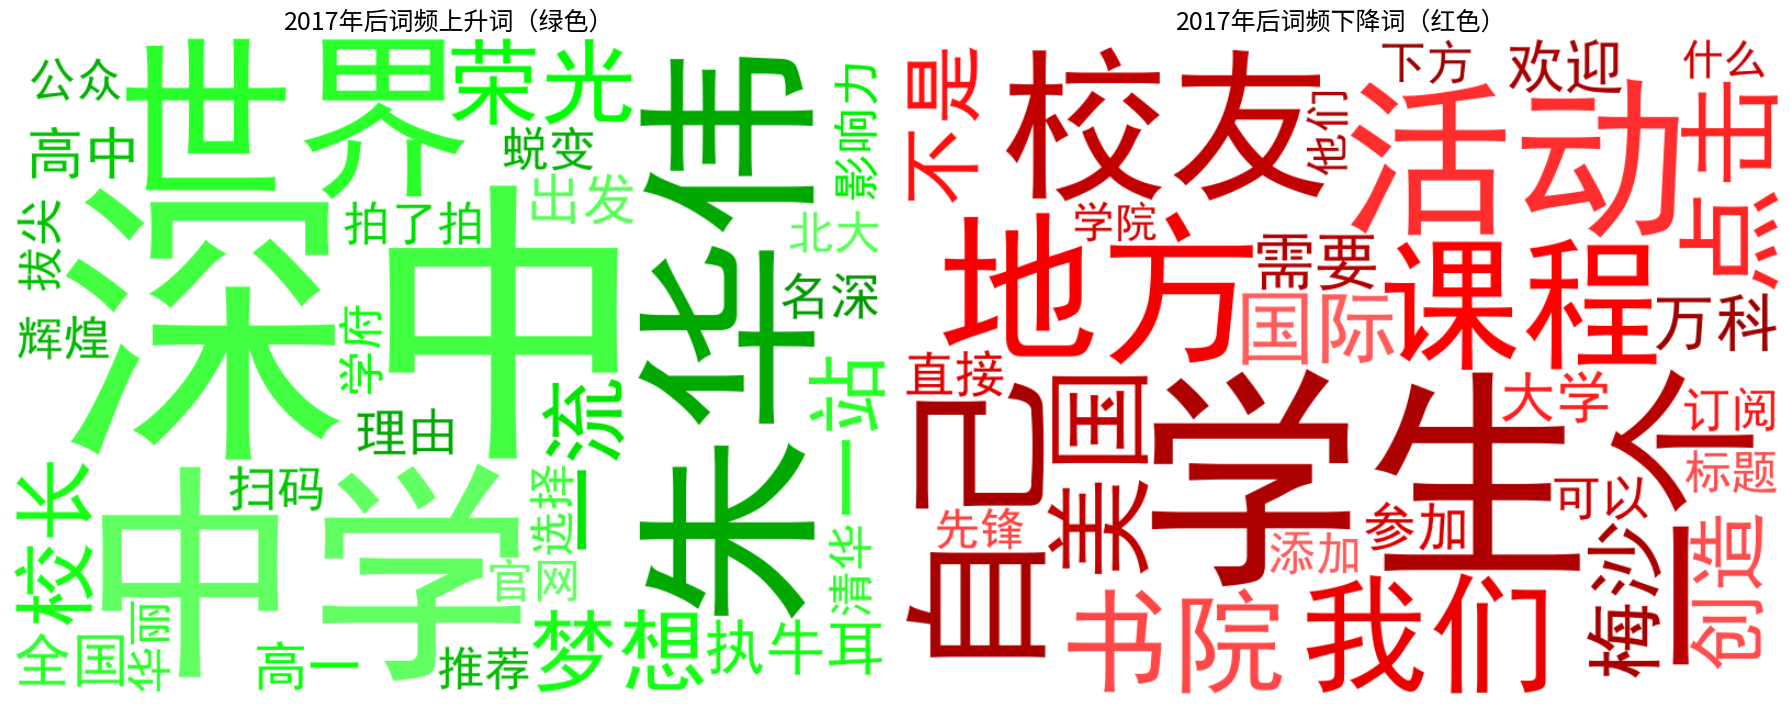

In [54]:
# 自定义停用词（可选）
my_stopwords = {}

# 假设 rise_df, fall_df 是 compute_keyword_freq_shift_dual() 的输出
plot_rise_fall_wordclouds(rise_df, fall_df, stopwords=my_stopwords)


# 开始主题模型啦！

In [4]:
text_df = prepare_text_data(metadata)

NameError: name 'prepare_text_data' is not defined

In [19]:
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被', '深圳',
                '深中', '中学', '我们', '名深','扫码','左右滑动查看更多',
                "很多", "选择", "开始", "觉得",  "喜欢", "这些", "就是",
                 "当时",   "其实", "真的", "一起", "真正",
                 'of','the','The','and','to','in','you','is','was','it'
]
)


In [ ]:
# 创建主题-文档分布矩阵
def create_topic_distribution_matrix(model, corpus, num_topics):
    # 初始化分布矩阵
    doc_topic_dist = np.zeros((len(corpus), num_topics))
    
    # 填充分布矩阵
    for i, doc in enumerate(corpus):
        topic_dist = model.get_document_topics(doc)
        for topic_id, prob in topic_dist:
            doc_topic_dist[i, topic_id] = prob
    
    return doc_topic_dist

# 获取主题分布矩阵
topic_dist_matrix = create_topic_distribution_matrix(best_model, corpus[:50], best_topic_num)  # 只取前50篇文档以便于可视化

# 创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(
    topic_dist_matrix,
    cmap='YlOrRd',
    xticklabels=[f'主题{i+1}' for i in range(best_topic_num)],
    yticklabels=[f'文档{i+1}' for i in range(50)],
    cbar_kws={'label': '主题概率'}
)
plt.title('文档-主题分布热图（前50篇文档）')
plt.xlabel('主题')
plt.ylabel('文档')
plt.tight_layout()
plt.show()

# 计算并展示主题之间的相关性
topic_correlations = np.corrcoef(topic_dist_matrix.T)

plt.figure(figsize=(10, 8))
sns.heatmap(
    topic_correlations,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    xticklabels=[f'主题{i+1}' for i in range(best_topic_num)],
    yticklabels=[f'主题{i+1}' for i in range(best_topic_num)]
)
plt.title('主题相关性热图')
plt.tight_layout()
plt.show()

In [20]:
import jieba
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# 文本预处理函数
def preprocess_text(text):
    # 分词
    words = jieba.cut(text)
    # 过滤停用词和单字词
    return [word for word in words if len(word) > 1 and word not in stopwords]

# 处理所有文章
documents = []
for idx in metadata.index:
    text = read_article(idx)
    if text:
        processed_doc = preprocess_text(text)
        if processed_doc:  # 确保文档不为空
            documents.append(processed_doc)

# 创建词典
dictionary = corpora.Dictionary(documents)

# 过滤极端频率的词
dictionary.filter_extremes(no_below=5, no_above=0.75)

# 创建文档-词频矩阵
corpus = [dictionary.doc2bow(doc) for doc in documents]

# 设置主题数
num_topics = 10


In [ ]:

# 训练LDA模型
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

主题关键词分布：
--------------------------------------------------
主题 0:
0.046*"学生" + 0.021*"课程" + 0.016*"学习" + 0.015*"数学" + 0.015*"老师" + 0.013*"教育" + 0.010*"教学" + 0.009*"能力" + 0.008*"学科" + 0.008*"通过" + 0.008*"数理" + 0.007*"培养" + 0.007*"研究" + 0.007*"教师" + 0.006*"博士"

主题 1:
0.035*"2023" + 0.023*"招生" + 0.022*"学校" + 0.021*"报名" + 0.020*"2024" + 0.019*"考生" + 0.015*"自主" + 0.014*"录取" + 0.011*"招聘" + 0.011*"考核" + 0.009*"中考" + 0.008*"专项" + 0.008*"工作" + 0.008*"时间" + 0.008*"成绩"

主题 2:
0.034*"全国" + 0.025*"竞赛" + 0.020*"一等奖" + 0.016*"获奖" + 0.016*"数学" + 0.016*"广东省" + 0.015*"入选" + 0.014*"奥林匹克" + 0.014*"比赛" + 0.013*"物理" + 0.013*"学校" + 0.012*"中学生" + 0.012*"金牌" + 0.011*"化学" + 0.010*"中国"

主题 3:
0.026*"荣光" + 0.013*"中国" + 0.012*"同学" + 0.011*"创新" + 0.010*"教授" + 0.010*"牵手" + 0.010*"世界" + 0.009*"院士" + 0.009*"科学" + 0.008*"科技" + 0.007*"梦想" + 0.007*"项目" + 0.006*"研究" + 0.006*"国家" + 0.006*"讲座"

主题 4:
0.021*"活动" + 0.015*"家长" + 0.011*"00" + 0.011*"图书馆" + 0.010*"疫情" + 0.010*"关注" + 0.010*"线上" + 0.009*"国际部" + 0.009*"时间" + 0.009*

c:\Users\18487\miniconda3\envs\lda_env\lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


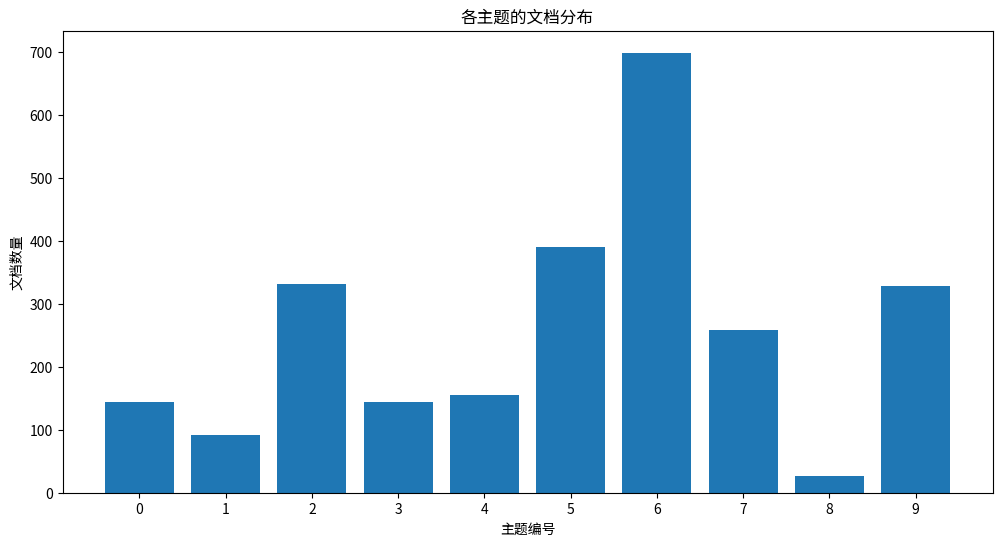


各主题的文档分布统计：
--------------------------------------------------
主题 0: 144 篇文档 (6.06%)
主题 1: 91 篇文档 (3.83%)
主题 2: 332 篇文档 (13.97%)
主题 3: 144 篇文档 (6.06%)
主题 4: 156 篇文档 (6.56%)
主题 5: 391 篇文档 (16.45%)
主题 6: 699 篇文档 (29.41%)
主题 7: 259 篇文档 (10.90%)
主题 8: 26 篇文档 (1.09%)
主题 9: 329 篇文档 (13.84%)


In [31]:
# 打印每个主题的前15个关键词
print("主题关键词分布：")
print("-" * 50)
for idx, topic in lda_model.print_topics(-1, num_words=15):
    print(f'主题 {idx}:')
    print(topic)
    print()

# 准备交互式可视化
vis_data = pyLDAvis.gensim_models.prepare(
    lda_model, corpus, dictionary,
    mds='mmds',
    R=30
)
# 保存可视化结果到HTML文件
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

# 分析文档-主题分布
def get_document_topics(lda_model, corpus, threshold=0.3):
    """获取文档主题分布中主题概率大于阈值的主题"""
    doc_topics = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        major_topics = [topic for topic, prob in topics if prob >= threshold]
        doc_topics.append(major_topics)
    return doc_topics

doc_topics = get_document_topics(lda_model, corpus)

# 统计每个主题的文档数量
topic_counts = {i: 0 for i in range(num_topics)}
for doc_topic_list in doc_topics:
    for topic in doc_topic_list:
        topic_counts[topic] += 1

# 可视化主题分布
plt.figure(figsize=(12, 6))
topics = list(topic_counts.keys())
counts = list(topic_counts.values())

plt.bar(topics, counts)
plt.title('各主题的文档分布')
plt.xlabel('主题编号')
plt.ylabel('文档数量')
plt.xticks(topics)
plt.show()

# 输出每个主题的文档数量和占比
print("\n各主题的文档分布统计：")
print("-" * 50)
total_docs = len(corpus)
for topic, count in topic_counts.items():
    percentage = (count / total_docs) * 100
    print(f"主题 {topic}: {count} 篇文档 ({percentage:.2f}%)")

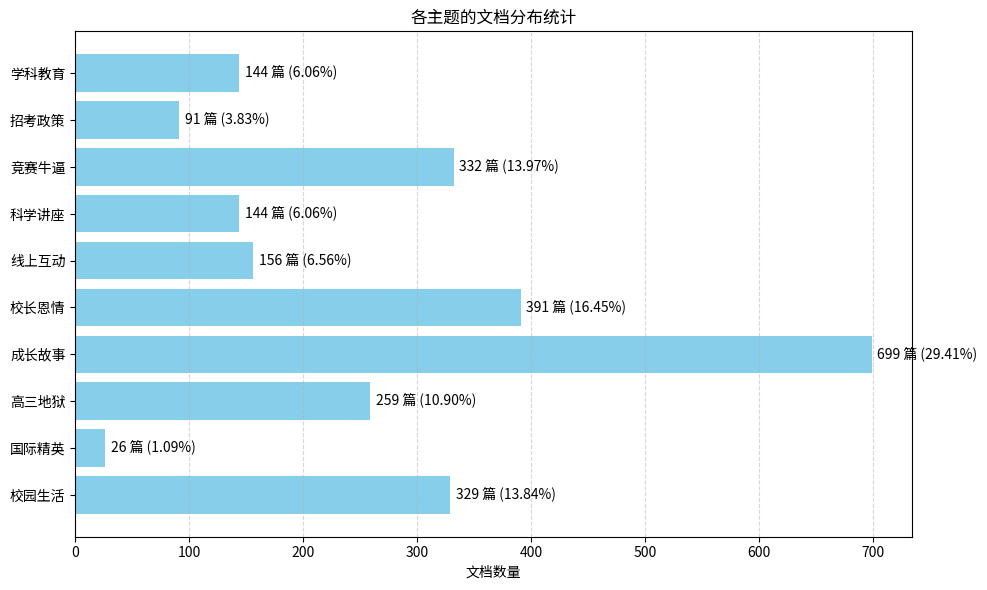

In [1]:
import matplotlib.pyplot as plt
import zhplot
# 主题文档数量数据
topic_ids = list(range(10))
doc_counts = [144, 91, 332, 144, 156, 391, 699, 259, 26, 329]
doc_percents = [6.06, 3.83, 13.97, 6.06, 6.56, 16.45, 29.41, 10.90, 1.09, 13.84]
topic_labels = [
    "学科教育", "招考政策", "竞赛牛逼", "科学讲座", "线上互动",
    "校长恩情", "成长故事", "高三地狱", "国际精英", "校园生活"
]

# 横向条形图
plt.figure(figsize=(10, 6))
bars = plt.barh(topic_labels, doc_counts, color='skyblue')
plt.xlabel("文档数量")
plt.title("各主题的文档分布统计")

# 添加文本标注
for bar, count, percent in zip(bars, doc_counts, doc_percents):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f"{count} 篇 ({percent:.2f}%)", va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [76]:
# 主题编号到主题标签的映射
topic_labels = {
    0: "学科教育",
    1: "招考政策",
    2: "竞赛牛逼",
    3: "科学讲座",
    4: "线上互动",
    5: "校长恩情",
    6: "成长故事",
    7: "高三地狱",
    8: "国际精英",
    9: "校园生活"
}


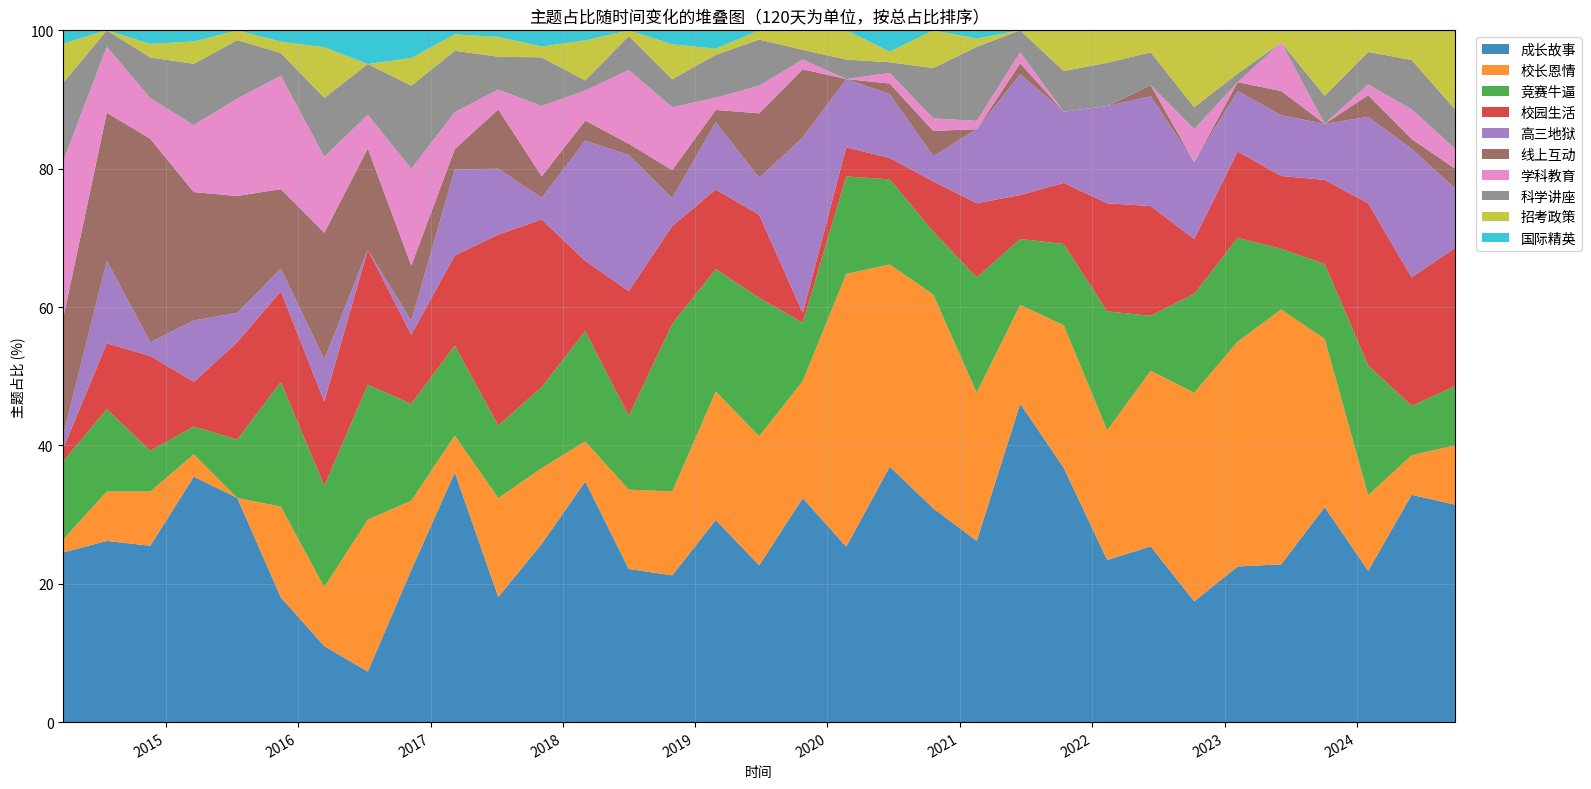

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_topics_over_time_stacked(metadata_df, doc_topics, num_topics, window_days=180):
    """绘制堆叠面积图展示主题随时间变化的占比"""
    # 1. 结构化原始数据
    topic_time_data = []
    for idx, doc_topic_list in enumerate(doc_topics):
        if doc_topic_list:
            date = metadata_df.iloc[idx]['发布时间']
            for topic in doc_topic_list:
                topic_time_data.append({
                    'date': date,
                    'topic': topic
                })
    
    topic_time_df = pd.DataFrame(topic_time_data)
    topic_time_df['date'] = pd.to_datetime(topic_time_df['date'])

    # 2. 构造时间窗口
    time_windows = pd.date_range(
        start=topic_time_df['date'].min(),
        end=topic_time_df['date'].max(),
        freq=f'{window_days}D'
    )
    
    # 3. 聚合每个时间窗口的主题分布
    topic_trends = []
    for start_time in time_windows:
        end_time = start_time + pd.Timedelta(days=window_days)
        window_data = topic_time_df[
            (topic_time_df['date'] >= start_time) & 
            (topic_time_df['date'] < end_time)
        ]
        total_docs = len(window_data)
        topic_counts = window_data['topic'].value_counts()
        
        row = {'window_start': start_time}
        for topic in range(num_topics):
            count = topic_counts.get(topic, 0)
            row[f'topic_{topic}'] = count / total_docs * 100 if total_docs > 0 else 0
        topic_trends.append(row)

    trends_df = pd.DataFrame(topic_trends)
    trends_df.set_index('window_start', inplace=True)

    # 4. 按总占比排序
    total_proportions = trends_df.sum(axis=0)
    sorted_topics = total_proportions.sort_values(ascending=False).index.tolist()  # e.g. ['topic_2', 'topic_0', ...]

    # 获取排序后的数据与标签
    sorted_data = [trends_df[col] for col in sorted_topics]
    sorted_labels = [topic_labels[int(col.split('_')[1])] for col in sorted_topics]
    
    # 5. 绘制堆叠图（去除空白边）
    fig, ax = plt.subplots(figsize=(16, 8))

    ax.stackplot(
        trends_df.index,
        sorted_data,
        labels=sorted_labels,
        alpha=0.85
    )

    ax.set_title(f'主题占比随时间变化的堆叠图（{window_days}天为单位，按总占比排序）')
    ax.set_xlabel('时间')
    ax.set_ylabel('主题占比 (%)')
    ax.set_ylim(0, 100)  # 固定纵坐标范围
    ax.set_xlim(trends_df.index.min(), trends_df.index.max())  # 精确限制横坐标
    ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
    ax.grid(alpha=0.3)
    ax.margins(x=0, y=0)  # 不留边缘空白
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
analyze_topics_over_time_stacked(metadata_df=metadata, doc_topics=doc_topics, num_topics=10, window_days=120)


In [39]:
lda_model.save("lda_model.model")

### 加载主题模型

In [3]:
from gensim.models import LdaModel

# 加载保存的LDA模型
loaded_model = LdaModel.load("lda_model.model")

# 验证模型加载成功
print("模型主题数量：", loaded_model.num_topics)
print("\n示例主题-词语分布：")
print("-" * 50)
for idx, topic in loaded_model.print_topics(num_topics=3, num_words=10):
    print(f'主题 {idx}:')
    print(topic)
    print()

模型主题数量： 10

示例主题-词语分布：
--------------------------------------------------
主题 8:
0.060*"大学" + 0.056*"录取" + 0.023*"学院" + 0.016*"37" + 0.016*"美国" + 0.012*"英国" + 0.010*"申请" + 0.010*"University" + 0.009*"学校" + 0.009*"排名"

主题 5:
0.026*"朱华伟" + 0.022*"校长" + 0.021*"2022" + 0.019*"学校" + 0.016*"世界" + 0.015*"教育" + 0.014*"创新" + 0.014*"一流" + 0.010*"发展" + 0.010*"培养"

主题 6:
0.009*"他们" + 0.008*"生活" + 0.008*"同学" + 0.007*"老师" + 0.005*"成为" + 0.005*"你们" + 0.005*"一种" + 0.005*"大家" + 0.005*"世界" + 0.004*"成长"



In [59]:
def analyze_word_in_topics(model, word, topic_labels=None):
    """
    分析特定词语在各个主题中的分布情况
    
    参数:
    model: LDA模型
    word: 要分析的词语
    topic_labels: 主题标签字典（可选）
    """
    # 获取词语在每个主题中的概率
    word_topic_dist = []
    for topic_id in range(model.num_topics):
        # 获取主题的词语分布
        topic_terms = dict(model.show_topic(topic_id, topn=1000))
        # 获取词语在该主题中的概率
        prob = topic_terms.get(word, 0)
        topic_name = topic_labels[topic_id] if topic_labels else f"主题 {topic_id}"
        word_topic_dist.append((topic_name, prob))
    
    # 按概率排序
    word_topic_dist.sort(key=lambda x: x[1], reverse=True)
    
    # 打印结果
    print(f"\n词语 '{word}' 在各个主题中的分布：")
    print("-" * 50)
    for topic_name, prob in word_topic_dist:
        if prob > 0:
            print(f"{topic_name}: {prob:.4f}")
    
    # 可视化
    topics, probs = zip(*word_topic_dist)
    plt.figure(figsize=(12, 6))
    plt.bar(topics, probs)
    plt.title(f"词语 '{word}' 在各主题中的分布")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('概率')
    plt.tight_layout()
    plt.show()



词语 '北大' 在各个主题中的分布：
--------------------------------------------------
校长恩情: 0.0035
竞赛牛逼: 0.0032
高三地狱: 0.0014
科学讲座: 0.0005


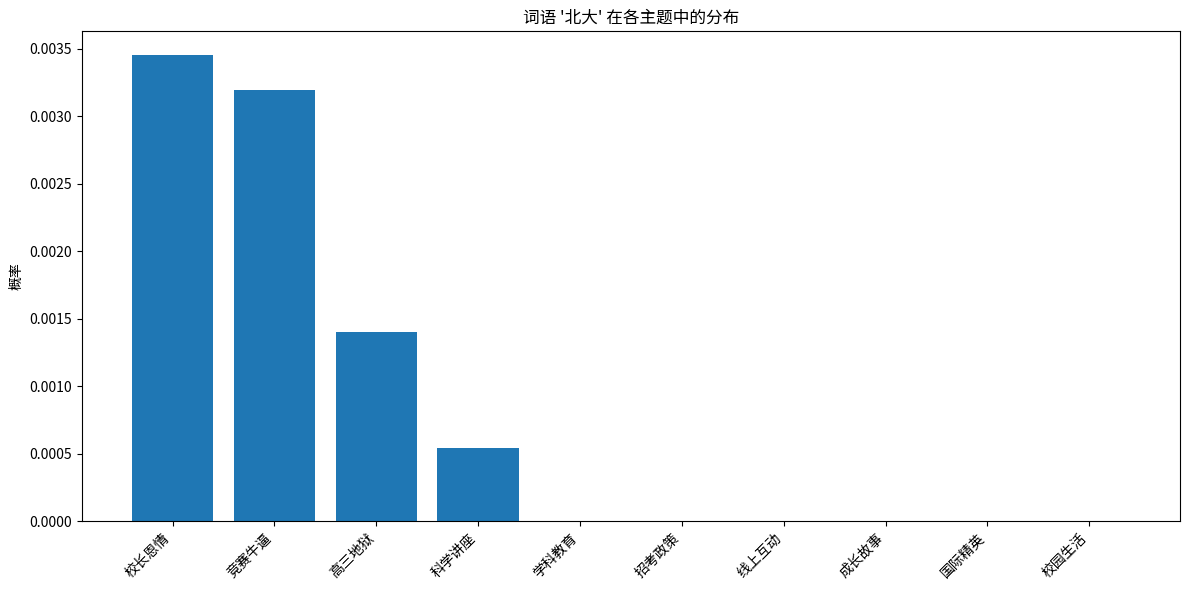

In [65]:

# 使用示例
word_to_analyze = "北大"  # 这里可以替换成您想分析的词
analyze_word_in_topics(loaded_model, word_to_analyze, topic_labels)

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

def show_topic_wordclouds(model, topic_id1, topic_id2, num_words=50, topic_labels=None):
    """
    并排展示两个主题的词云图

    参数:
    model: LDA模型
    topic_id1: 第一个主题ID
    topic_id2: 第二个主题ID
    num_words: 每个主题展示的词数
    topic_labels: 可选的主题标签字典
    """
    # 内部函数：获取词频字典
    def get_word_dict(topic_id):
        words = model.show_topic(topic_id, topn=num_words)
        word_dict = {}
        for word, prob in words:
            try:
                word_dict[word] = float(prob) * 1000  # 放大权重以增强词云效果
            except ValueError:
                print(f"跳过非法概率值：{prob}（词：{word}）")
        return word_dict

    # 获取两个词典
    word_dict1 = get_word_dict(topic_id1)
    word_dict2 = get_word_dict(topic_id2)

    # 获取主题标签
    name1 = topic_labels.get(topic_id1, f"主题 {topic_id1}") if topic_labels else f"主题 {topic_id1}"
    name2 = topic_labels.get(topic_id2, f"主题 {topic_id2}") if topic_labels else f"主题 {topic_id2}"

    # 绘制词云
    wc1 = WordCloud(
        font_path='C:/Windows/Fonts/STXIHEI.TTF',
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(word_dict1)

    wc2 = WordCloud(
        font_path='C:/Windows/Fonts/STXIHEI.TTF',
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(word_dict2)

    # 展示两个词云图
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].imshow(wc1, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title(f'{name1} 的词云', fontsize=18)

    axs[1].imshow(wc2, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title(f'{name2} 的词云', fontsize=18)

    plt.tight_layout()
    plt.show()


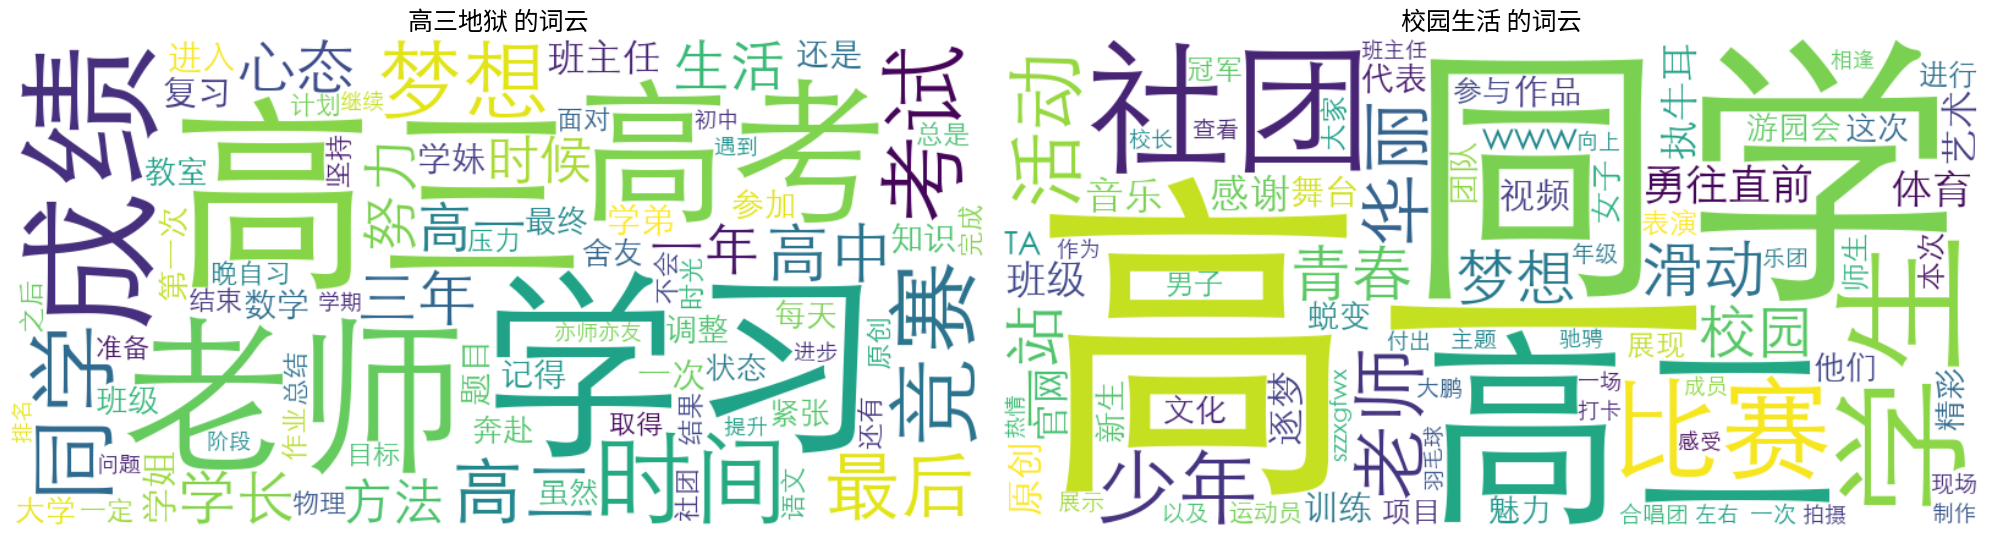

In [74]:
show_topic_wordclouds(loaded_model,7 , 9, num_words=80, topic_labels=topic_labels)


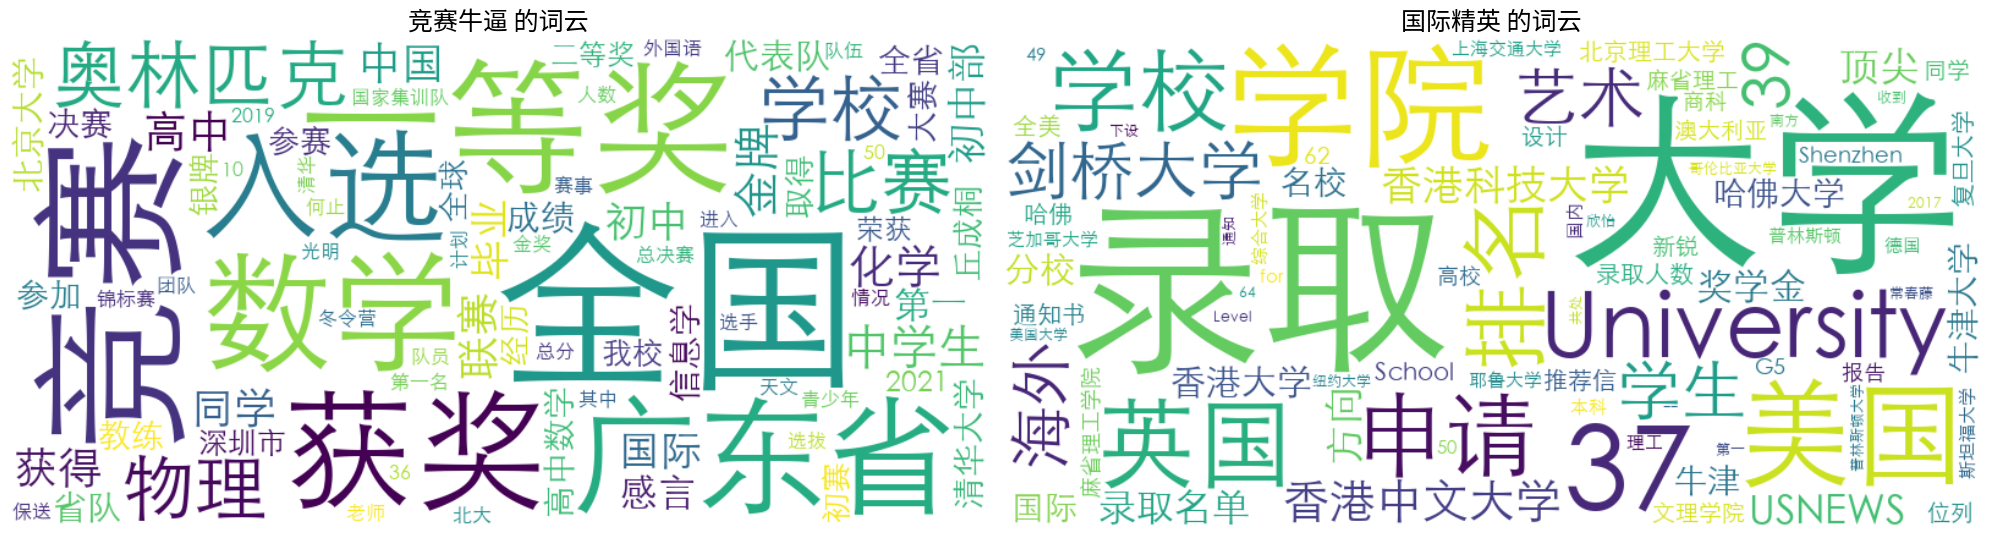

In [80]:
show_topic_wordclouds(loaded_model,2 , 8, num_words=80, topic_labels=topic_labels)


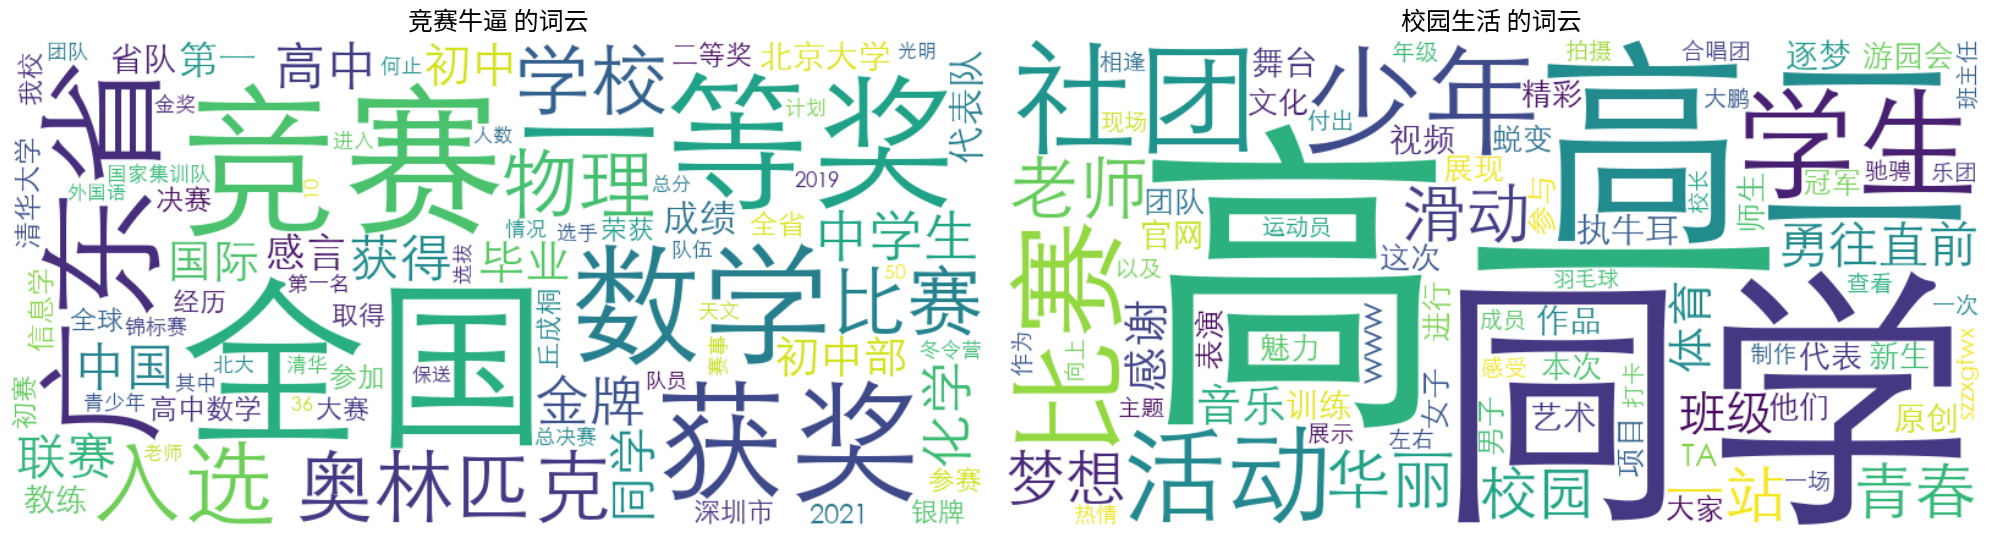

In [79]:
show_topic_wordclouds(loaded_model,2 , 9, num_words=80, topic_labels=topic_labels)


In [21]:
def compare_topic_distribution_by_period(text_df, lda_model, dictionary, split_year=2020):
    """
    比较 split_year 年前后两个时期各主题的平均占比

    参数:
    text_df: 包含 '发布时间' 和 '内容' 列的 DataFrame
    lda_model: 已训练的 LDA 模型
    dictionary: 与 LDA 模型匹配的 Dictionary
    split_year: 年份分割点，默认 2020

    返回:
    before_avg, after_avg: 各主题在两个时期的平均占比
    """

    # 自动分词
    if 'tokens' not in text_df.columns:
        text_df['tokens'] = text_df['内容'].apply(lambda x: list(jieba.cut(x)))

    # 构建语料
    corpus = [dictionary.doc2bow(tokens) for tokens in text_df['tokens']]

    # 转换时间格式
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])

    # 获取每篇文章的主题分布（每篇文档得到完整主题分布向量）
    num_topics = lda_model.num_topics
    topic_matrix = np.zeros((len(corpus), num_topics))
    for i, bow in enumerate(corpus):
        for topic_id, prob in lda_model.get_document_topics(bow, minimum_probability=0):
            topic_matrix[i, topic_id] = prob

    # 分期掩码
    before_mask = text_df['发布时间'].dt.year < split_year
    after_mask = ~before_mask

    before_avg = topic_matrix[before_mask.values].mean(axis=0)
    after_avg = topic_matrix[after_mask.values].mean(axis=0)

    # 打印结果
    print(f"--- {split_year} 年前主题平均占比 ---")
    for i, val in enumerate(before_avg):
        print(f"主题 {i}: {val:.4f}")
    
    print(f"\n--- {split_year} 年后主题平均占比 ---")
    for i, val in enumerate(after_avg):
        print(f"主题 {i}: {val:.4f}")

    return before_avg, after_avg


In [23]:
from gensim import corpora

# 假设你之前保存的 LDA 模型文件是 lda_model.model
dictionary = corpora.Dictionary.load("C:/Users/18487/Desktop/25暑假事务/爬公众号玩玩/lda_model.model.id2word")

compare_topic_distribution_by_period(text_df, loaded_model, dictionary, split_year=2020)

--- 2020 年前主题平均占比 ---
主题 0: 0.1110
主题 1: 0.0335
主题 2: 0.1192
主题 3: 0.0779
主题 4: 0.0909
主题 5: 0.1139
主题 6: 0.1979
主题 7: 0.0928
主题 8: 0.0295
主题 9: 0.1334

--- 2020 年后主题平均占比 ---
主题 0: 0.0667
主题 1: 0.0479
主题 2: 0.1095
主题 3: 0.0740
主题 4: 0.0389
主题 5: 0.2130
主题 6: 0.2023
主题 7: 0.1080
主题 8: 0.0112
主题 9: 0.1285


(array([0.11098311, 0.03352193, 0.11922624, 0.0778736 , 0.09086288,
        0.1139163 , 0.19789401, 0.09280511, 0.02953204, 0.13338476]),
 array([0.06668733, 0.0478762 , 0.1095391 , 0.07401511, 0.03890196,
        0.21301671, 0.20230003, 0.10796024, 0.01123414, 0.12846919]))

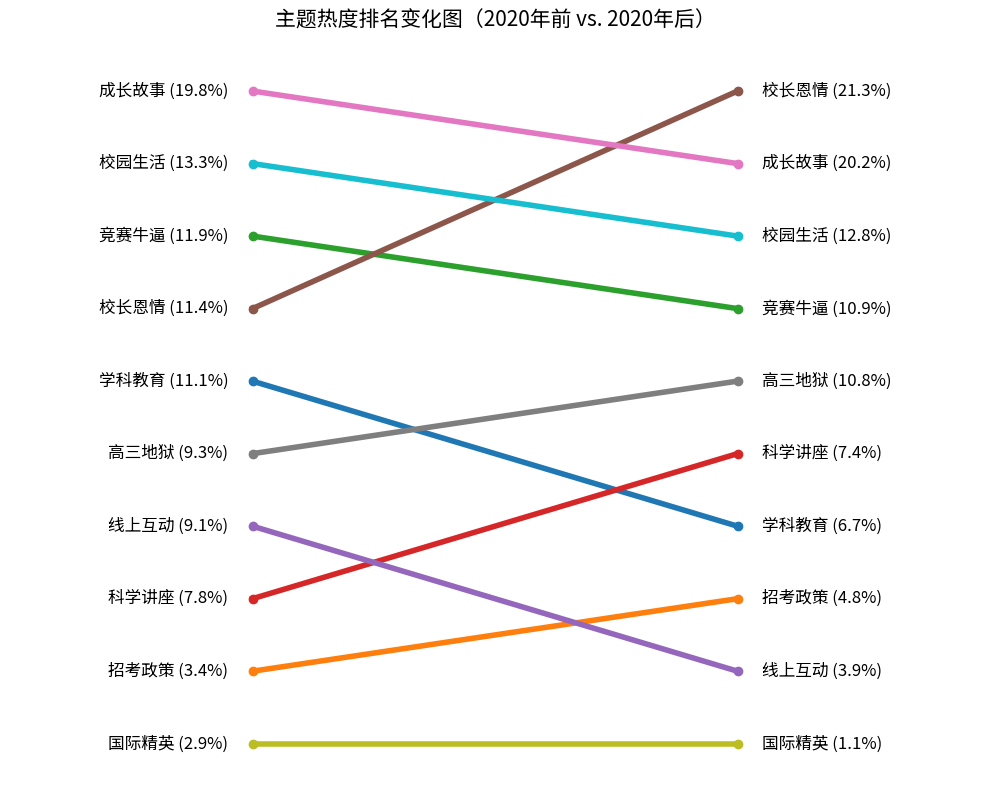

In [30]:
import matplotlib.pyplot as plt

# 主题编号到中文标签的映射
topic_labels = {
    0: "学科教育",
    1: "招考政策",
    2: "竞赛牛逼",
    3: "科学讲座",
    4: "线上互动",
    5: "校长恩情",
    6: "成长故事",
    7: "高三地狱",
    8: "国际精英",
    9: "校园生活"
}

# 两个时期的主题平均占比（小数形式）
pre2020_dist = {
    0: 0.1110,
    1: 0.0335,
    2: 0.1192,
    3: 0.0779,
    4: 0.0909,
    5: 0.1139,
    6: 0.1979,
    7: 0.0928,
    8: 0.0295,
    9: 0.1334
}

post2020_dist = {
    0: 0.0667,
    1: 0.0479,
    2: 0.1095,
    3: 0.0740,
    4: 0.0389,
    5: 0.2130,
    6: 0.2023,
    7: 0.1080,
    8: 0.0112,
    9: 0.1285
}

# 按占比降序排序获取排名
pre_sorted = sorted(pre2020_dist.items(), key=lambda x: -x[1])
post_sorted = sorted(post2020_dist.items(), key=lambda x: -x[1])

pre_ranks = {topic: i for i, (topic, _) in enumerate(pre_sorted)}
post_ranks = {topic: i for i, (topic, _) in enumerate(post_sorted)}

# 绘图
fig, ax = plt.subplots(figsize=(10, 8))

for topic in range(10):
    x = [0, 1]
    y = [pre_ranks[topic], post_ranks[topic]]
    ax.plot(x, y, marker='o', linewidth=4)

    pre_label = f"{topic_labels[topic]} ({pre2020_dist[topic]*100:.1f}%)"
    post_label = f"{topic_labels[topic]} ({post2020_dist[topic]*100:.1f}%)"

    ax.text(-0.05, y[0], pre_label, ha='right', va='center', fontsize=12)
    ax.text(1.05, y[1], post_label, ha='left', va='center', fontsize=12)

# 设置样式
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 9.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['2020 年前', '2020 年后'], fontsize=12)
ax.invert_yaxis()
ax.set_title("主题热度排名变化图（2020年前 vs. 2020年后）", fontsize=15, pad=20)

# 去除坐标轴和边框
ax.axis('off')

plt.tight_layout()
plt.show()
